##### Import the Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


##### Data Collection & Analysis

In [4]:
# loading the data from csv file to a Pandas DataFrame
df_liver = pd.read_csv(r"C:\Multiple Disease prediction.Project\DataSet\indian_liver_patient - indian_liver_patient.csv")


In [5]:
# printing the first 5 rows of the dataframe
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
# number of rows and columns in the data frame
df_liver.shape

(583, 11)

In [7]:
# getting more information about the dataset
df_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
# getting some statistical measures about the data
df_liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
# checking the missing values in each column
df_liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
# Fill missing values in the 'Albumin_and_Globulin_Ratio' column with the value 0.947064
df_liver['Albumin_and_Globulin_Ratio'] = df_liver['Albumin_and_Globulin_Ratio'].fillna(0.947064)


In [11]:
# checking the missing values in each column
df_liver.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

##### Here 2 means suffering with disease and 1 means not suffering with disease.

##### Replacing 2 with 1 and 1 with 0, for better understanding.

In [14]:
# Replace values: 2 -> 1 and 1 -> 0
df_liver['Dataset'] = df_liver['Dataset'].replace([2, 1], [1, 0])
df_liver['Dataset'].head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

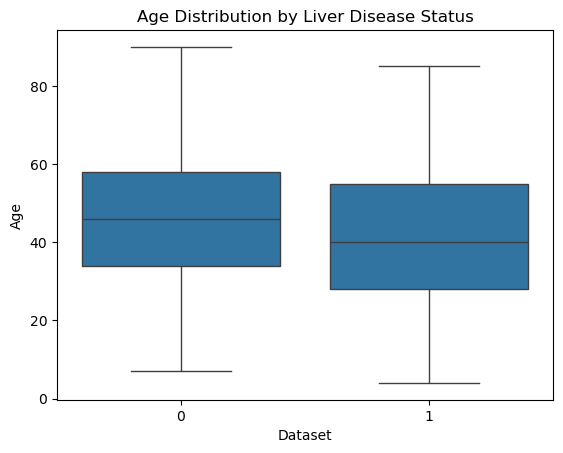

In [15]:
# Boxplot visualizes the spread and detects outliers in the 'Age' feature
# The 'Dataset' column is used to group the data by disease status (0 = No disease, 1 = Disease).
sns.boxplot(x='Dataset', y='Age', data=df_liver)
plt.title('Age Distribution by Liver Disease Status')
plt.xlabel('Dataset')
plt.ylabel('Age')
plt.show()


##### 0 ---> not suffering with disease.

#####  1 ---> suffering with disease 

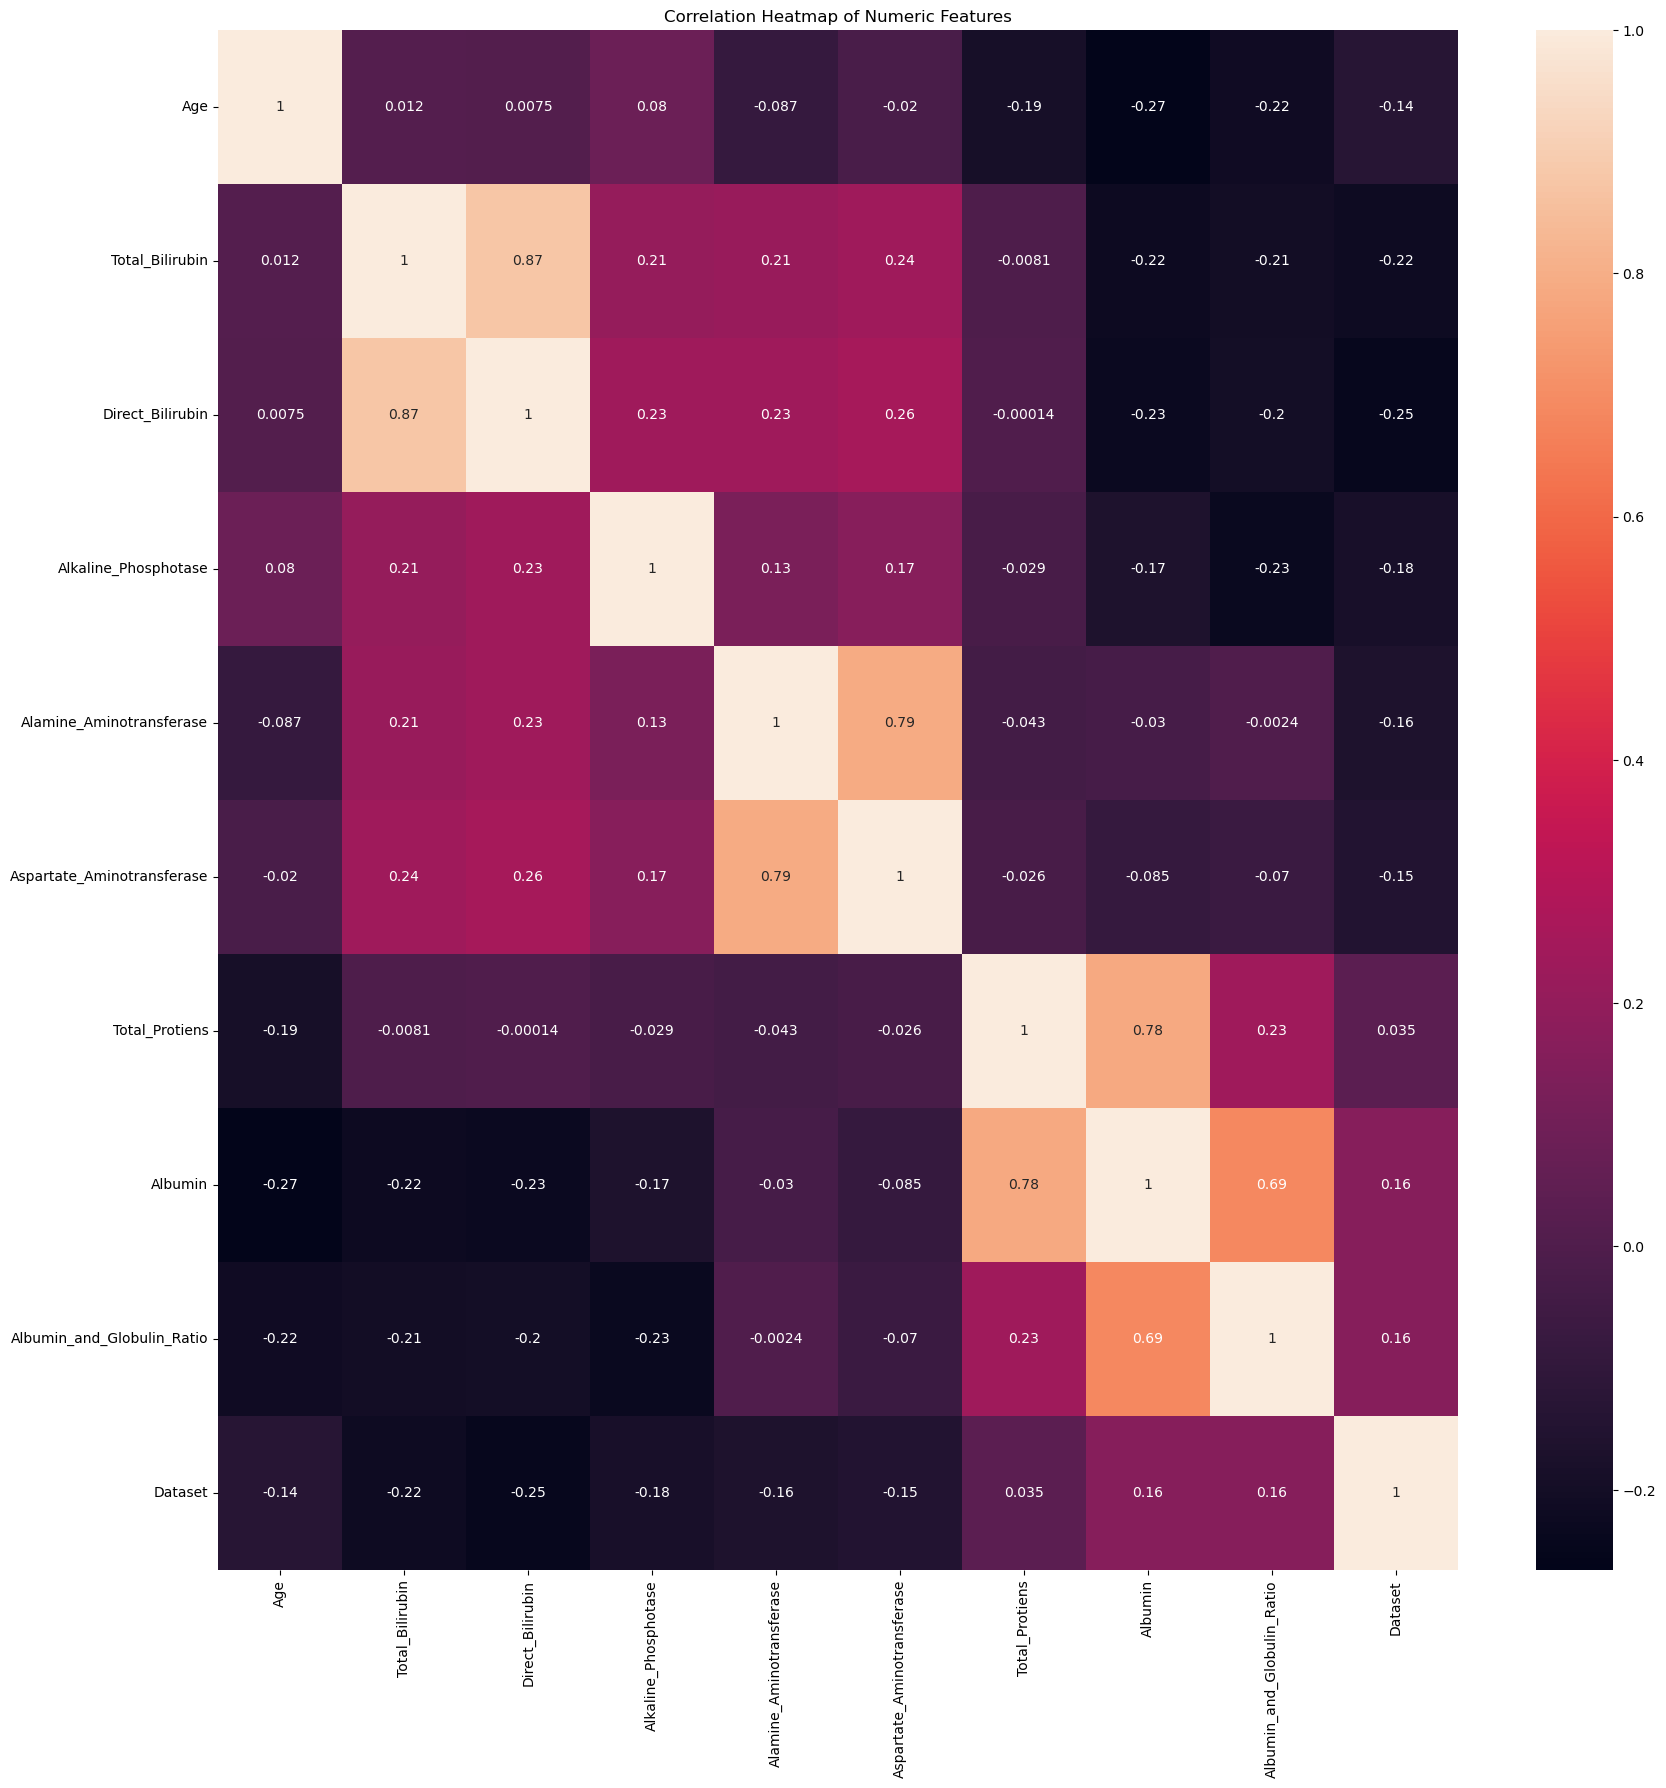

In [18]:
# This heatmap helps visualize how numeric features are correlated with each other.
# The 'annot=True' argument annotates the correlation coefficients on the heatmap.
# Drop non-numeric columns from the DataFrame
df_liver_numeric = df_liver.select_dtypes(exclude=['object'])

# Create the heatmap for the numeric data
plt.figure(figsize=(20, 20))
sns.heatmap(df_liver_numeric.corr(), annot=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()



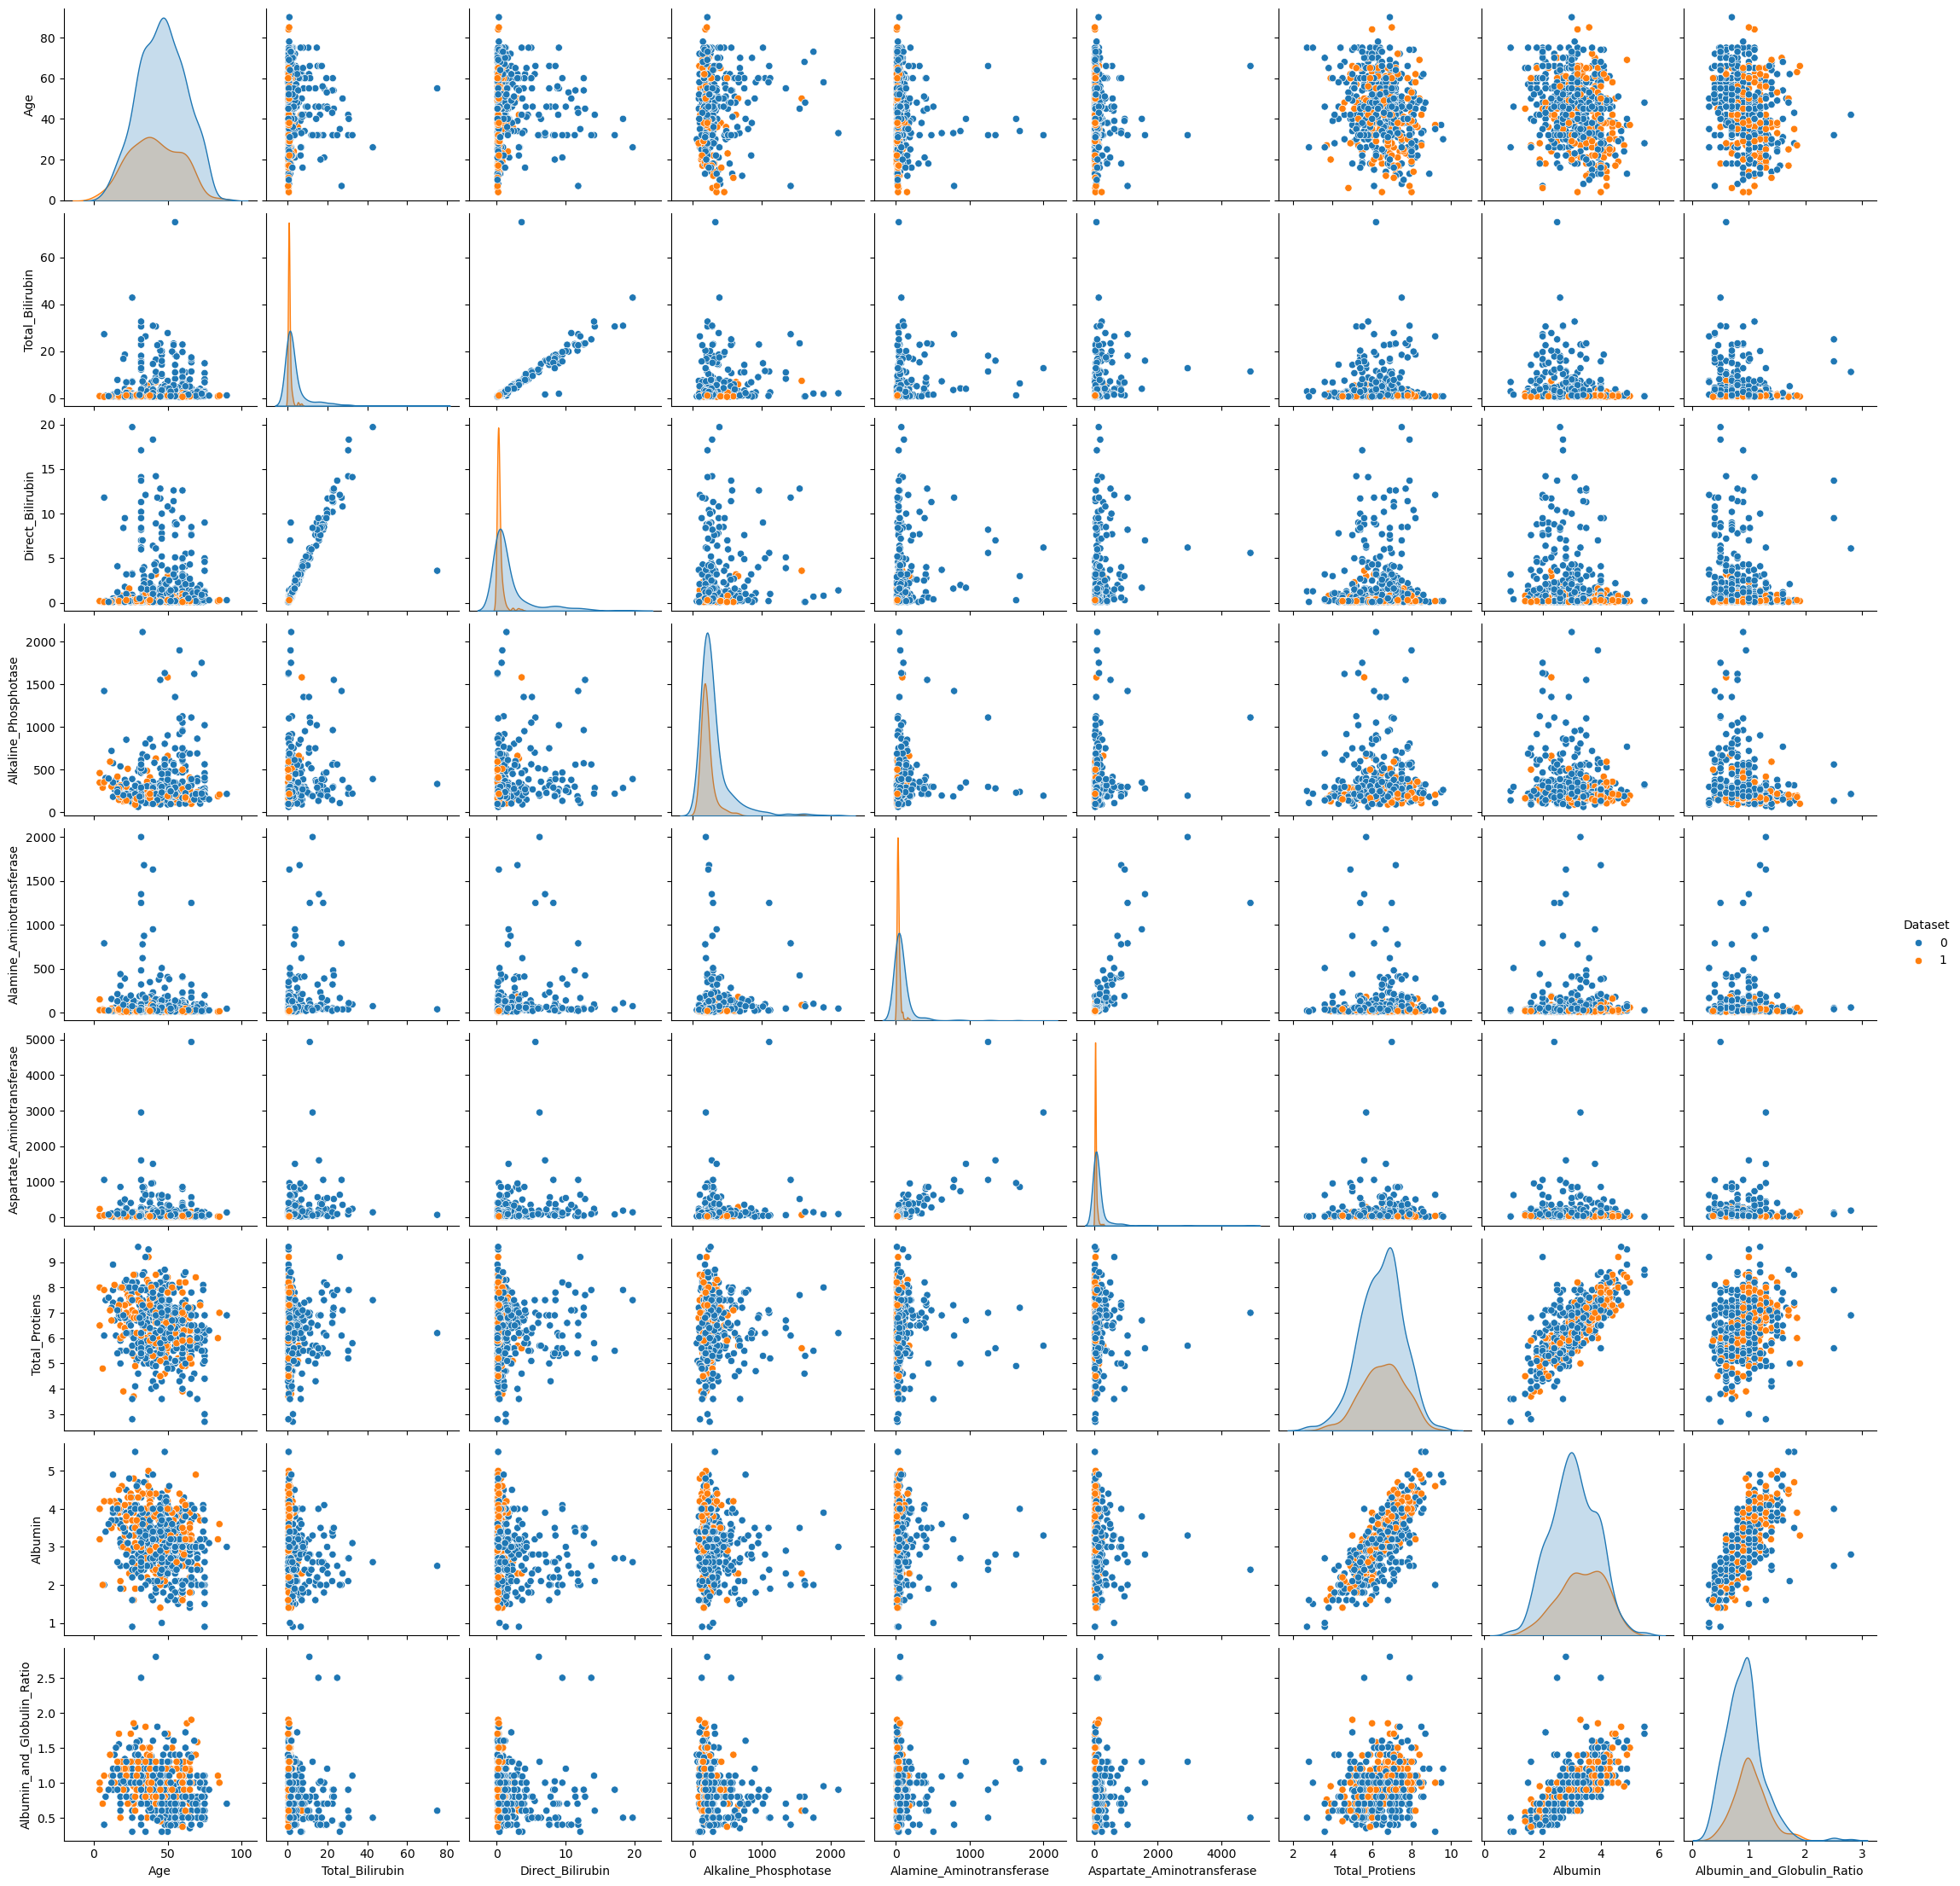

In [19]:
# Pairplot generates scatter plots for each feature combination in the dataset,
# and colors the points based on the 'Dataset' column (healthy vs diseased).
sns.pairplot(df_liver, hue='Dataset')
plt.show()


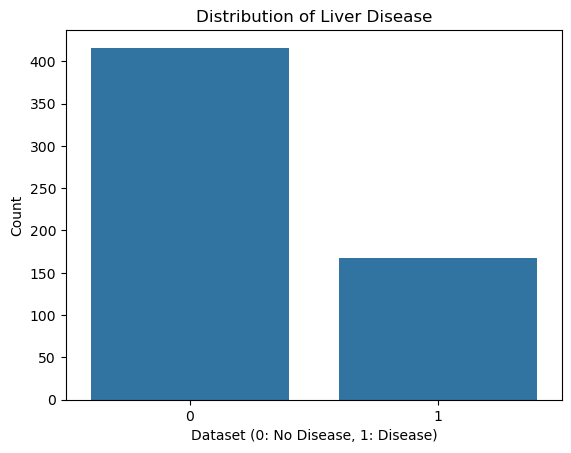

In [20]:
# Count plot helps in visualizing the distribution of categories in the 'Dataset' column,
# which indicates whether a person has liver disease (1) or not (0).
sns.countplot(x='Dataset', data=df_liver)
plt.title('Distribution of Liver Disease')
plt.xlabel('Dataset (0: No Disease, 1: Disease)')
plt.ylabel('Count')
plt.show()


##### Data Pre-Processing

##### Encoding the Gender Column

In [24]:
from sklearn.preprocessing import OrdinalEncoder  # Importing OrdinalEncoder class

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Encoding the 'Gender' column with OrdinalEncoder
df_liver['Gender'] = encoder.fit_transform(df_liver[['Gender']])

# Display the resulting DataFrame with the transformed 'Gender' column
df_liver.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,0


##### Separating the features & Target

In [26]:
# Separating features (X) by dropping the 'Dataset' column from the dataframe
X = df_liver.drop(columns=['Dataset'])  # Drop 'Dataset' column, all other columns will be features

# 'Dataset' column is the target variable, we are predicting it
y = df_liver['Dataset']


In [27]:
print(X)  # This will print the first 5 rows of the feature variables



     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65     0.0              0.7               0.1                   187   
1     62     1.0             10.9               5.5                   699   
2     62     1.0              7.3               4.1                   490   
3     58     1.0              1.0               0.4                   182   
4     72     1.0              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60     1.0              0.5               0.1                   500   
579   40     1.0              0.6               0.1                    98   
580   52     1.0              0.8               0.2                   245   
581   31     1.0              1.3               0.5                   184   
582   38     1.0              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [28]:
print(y)  # This will print the first 5 rows of the 'Dataset' column


0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 583, dtype: int64


##### Splitting the data to training data & Test data

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [31]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (524, 10) (524,)
Test Set:  (59, 10) (59,)


##### Model Training

In [33]:
pip install lazypredict


Note: you may need to restart the kernel to use updated packages.


In [34]:
# Importing the LazyClassifier
from lazypredict.Supervised import LazyClassifier

# Creating an instance of the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fitting the classifier and getting the models and predictions
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:01<00:00, 19.87it/s]


[LightGBM] [Info] Number of positive: 153, number of negative: 371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 524, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291985 -> initscore=-0.885764
[LightGBM] [Info] Start training from score -0.885764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
clf.fit(X_train, y_train)

# # Make predictions
# y_pred = clf.predict(X_test)

ExtraTreesClassifier(random_state=42)

##### Model Evaluation

##### Accuracy Score

In [38]:
# Import necessary metrics for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
# Calculate confusion matrix by comparing true labels (y_test) with predicted labels (clf.predict(X_test))
cm = confusion_matrix(y_test, clf.predict(X_test))

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[42  3]
 [ 7  7]]


In [40]:
# Calculate and print the accuracy score by comparing true labels (y_test) with predicted labels (clf.predict(X_test))
# The accuracy is multiplied by 100 to convert it to percentage, and rounded to 2 decimal places
print(f"Accuracy is {round(accuracy_score(y_test, clf.predict(X_test))*100,2)}")

Accuracy is 83.05


##### Saving the trained model

In [42]:
import pickle

In [43]:
# loading the saved model
pickle.dump(clf, open('liver.pkl', 'wb'))